# Package Installation and Data Reading

In [181]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
def read_csv_files_to_dataframes(relative_path: str) -> dict:
    """
    Read CSV files from a specified relative path and store them in separate DataFrames.

    Args:
    -----
        relative_path (str): The relative path of the directory containing the CSV files.

    Returns:
    -------
        dict: A dictionary where keys are the file names (without extension) and values are the corresponding DataFrames.

    Raises:
    ------
        FileNotFoundError: If the specified relative path does not exist.

    Example:
    -------
        dataframes = read_csv_files_to_dataframes('data_folder')
        df1 = dataframes['file1']  # Access the DataFrame for file1.csv
        df2 = dataframes['file2']  # Access the DataFrame for file2.csv
    """
    data_folder = os.path.join(os.getcwd(), relative_path)

    if not os.path.exists(data_folder):
        raise FileNotFoundError(f"The specified relative path '{relative_path}' does not exist.")

    csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]
    dataframes = {}

    for file in csv_files:
        file_path = os.path.join(data_folder, file)
        df_name = os.path.splitext(file)[0]
        dataframes[df_name] = pd.read_csv(file_path)

 

    return dataframes 

In [134]:
relative_path = "/Users/alexholzer/Desktop/retail_price_prediction/data"
dataframes = read_csv_files_to_dataframes(relative_path)

In [135]:
# create a DataFrame for each file
for file_name in dataframes:
    locals()[file_name] = dataframes[file_name].copy()
    print(file_name)

file_out2
file_out


# Data Familiarization

In [136]:
file_out.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33356 entries, 0 to 33355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33356 non-null  int64  
 1   DocumentID  33356 non-null  int64  
 2   Date        33356 non-null  object 
 3   SKU         33356 non-null  int64  
 4   Price       33356 non-null  float64
 5   Discount    33356 non-null  float64
 6   Customer    33356 non-null  int64  
 7   Quantity    33356 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ MB


In [170]:
file_out2.info(memory_usage='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29103 non-null  int64  
 1   InvoiceID   29103 non-null  int64  
 2   Date        29103 non-null  object 
 3   ProductID   29103 non-null  int64  
 4   TotalSales  29103 non-null  float64
 5   Discount    29103 non-null  float64
 6   CustomerID  29103 non-null  int64  
 7   Quantity    29103 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [137]:
column_mapping = {
    'Unnamed: 0': 'Unnamed: 0',
    'DocumentID': 'InvoiceID',
    'Date': 'Date',
    'SKU': 'ProductID',
    'Price': 'TotalSales',
    'Discount': 'Discount',
    'Customer': 'CustomerID',
    'Quantity': 'Quantity'
}

file_out.columns = [column_mapping[col] for col in file_out.columns]

In [138]:
retail_data_new = dataframes['file_out2']
retail_data_new.drop('Unnamed: 0', axis=1, inplace=True)
retail_data_new['Date']= pd.to_datetime(retail_data_new['Date'])

In [139]:
retail_data_new.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [189]:
retail_data_new.describe()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
count,29103.000000,29103,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000
mean,7221.321445,2020-12-03 12:14:25.395320320,869.953819,2552.679147,451.325294,247.290279,5.440367
min,0.000000,2019-01-02 00:00:00,0.000000,0.000000,-0.004694,0.000000,0.000000
25%,4919.000000,2019-11-13 00:00:00,379.000000,779.661017,137.288136,134.000000,2.000000
50%,7588.000000,2020-09-17 00:00:00,660.000000,1366.101695,244.067797,230.000000,4.000000
75%,9536.000000,2021-12-09 00:00:00,1456.000000,2847.457627,508.658644,349.000000,4.000000
max,14078.000000,2023-03-25 00:00:00,1939.000000,332574.460000,14110.169492,506.000000,250.000000
std,3443.397539,NaN,583.414204,4568.256400,650.359457,138.701207,6.804637


In [206]:
quantity_condition = retail_data_new['Quantity'] != 0
sales_condition = retail_data_new['TotalSales'] != 0
retail_data_new = retail_data_new[quantity_condition & sales_condition]

In [216]:
def compute_measures_of_dispersion(df: pd.DataFrame) -> pd.DataFrame:
    """
    Computes various dispersion (variability) measures for numeric columns in a DataFrame.

    Args:
    -----
        df (pandas.DataFrame): The input DataFrame.

    Returns:
    -------
        pandas.DataFrame: A DataFrame containing the computed measures for each numeric column.

             ``Column``: Name of the numeric column

            ``Minimum``: Minimum value in the column

            ``Maximum``: Maximum value in the column

            ``Range``: The difference between the maximum and minimum values in the column

            ``Variance``: The average of the squared differences from the mean. Formula: sum((x - mean)^2) / n
            
            ``STD``: Standard Deviation: The square root of the variance, providing a measure of the spread of data around the mean. Formula: sqrt(variance)
            
            ``CV``: Coefficient of Variation: The ratio of the standard deviation to the mean, expressed as a percentage. Formula: (std / mean) * 100
           
             ``MAD``: Median Absolute Deviation: The median of the absolute differences from the median. Formula: median(abs(x - median))
           
             ``SEM``: Standard Error of the Mean: An estimate of the standard deviation of the sample mean. Formula: std / sqrt(n)

            ``1% Quantile``: 1th percentile value in the column

            ``5% Quantile``: 5th percentile value in the column
              
             ``25% Quantile``: 25th percentile value in the column
            
            ``50% Quantile``: 50th percentile value (median) in the column
           
             ``75% Quantile``: 75th percentile value in the column

             ``95% Quantile``: 95th percentile value in the column

             `99% Quantile``: 99th percentile value in the column
           
             ``IQR``: Interquartile Range: The range between the 25th and 75th percentiles, capturing the middle 50% of the data. Formula: q3 - q1
           
             ``Upper Fence``: The upper limit beyond which a data point is considered an outlier. Formula: q3 + (1.5 * IQR)
           
             ``Lower Fence``: The lower limit beyond which a data point is considered an outlier. Formula: q1 - (1.5 * IQR)
           
             ``Skewness``: A measure of the asymmetry of the data distribution. Positive skewness indicates a longer tail on the right, while negative skewness indicates a longer tail on the left.
           
             ``Kurtosis``: A measure of the "peakedness" or "flatness" of the data distribution compared to a normal distribution. Higher kurtosis indicates a sharper peak (leptokurtic), while lower kurtosis indicates a flatter peak (platykurtic).
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("The input 'df' must be a pandas DataFrame.")

    numeric_columns = df.select_dtypes(include=['int', 'float'])
    if numeric_columns.empty:
        raise ValueError("No numeric columns found in the DataFrame.")           
    measures = []

    for column in numeric_columns:
        column_data = df[column]

        column_measures = {
            'Column': column,
            'Minimum': column_data.min(),
            'Maximum': column_data.max(),
            'Range': column_data.max() - column_data.min(),
            'Variance': column_data.var(),
            'STD': column_data.std(),
            'CV': stats.variation(column_data),
            'MAD': np.median(np.abs(column_data - column_data.median())),
            'SEM': stats.sem(column_data),
            '1% Quantile': column_data.quantile(0.01),
            '5% Quantile': column_data.quantile(0.05),
            '25% Quantile': column_data.quantile(0.25),
            '50% Quantile': column_data.median(),
            '75% Quantile': column_data.quantile(0.75),
            '95% Quantile': column_data.quantile(0.95),
            '99% Quantile': column_data.quantile(0.99),
            'IQR': stats.iqr(column_data),
            'Upper Fence': column_data.quantile(0.75) + (1.5 * stats.iqr(column_data)),
            'Lower Fence': column_data.quantile(0.25) - (1.5 * stats.iqr(column_data)),
            'Skewness': column_data.skew(),
            'Kurtosis': column_data.kurtosis()
          
        }

        measures.append(column_measures)

    return pd.DataFrame.from_records(measures).transpose()


# Unit Price Analysis

In [207]:
retail_data_new['unit_price'] = round(retail_data_new['TotalSales'] / retail_data_new['Quantity'], 2)

In [208]:
retail_data_new.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,unit_price
0,328,2019-12-27,1684,796.610169,143.389831,185,4,199.15
1,329,2019-12-27,524,355.932203,64.067797,185,2,177.97
2,330,2019-12-27,192,901.694915,162.305085,230,4,225.42
3,330,2019-12-27,218,182.754237,32.895763,230,1,182.75
4,330,2019-12-27,247,780.101695,140.418305,230,4,195.03


In [224]:
compute_measures_of_dispersion(retail_data_new[['unit_price']])

,0
Column,unit_price
Minimum,0.01
Maximum,166287.23
Range,166287.22
Variance,2210112.987924
STD,1486.644876
CV,2.705495
MAD,144.06
SEM,8.740888
1% Quantile,139.83


## Unit Price Outlier

In [231]:
upper_unit_price_threshold = \
                            compute_measures_of_dispersion(retail_data_new[['unit_price']]).loc['95% Quantile'].iloc[0]

In [233]:
cleaned_unit_price_condition = retail_data_new['unit_price'] < upper_unit_price_threshold
cleaned_unit_price_df = retail_data_new[cleaned_unit_price_condition]

In [234]:
cleaned_unit_price_df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,unit_price
0,328,2019-12-27,1684,796.610169,143.389831,185,4,199.15
1,329,2019-12-27,524,355.932203,64.067797,185,2,177.97
2,330,2019-12-27,192,901.694915,162.305085,230,4,225.42
3,330,2019-12-27,218,182.754237,32.895763,230,1,182.75
4,330,2019-12-27,247,780.101695,140.418305,230,4,195.03


In [235]:
cleaned_unit_price_df.groupby('ProductID')['unit_price'].mean()

ProductID
0       420.418333
1       547.860000
2       583.305714
3       487.290000
4       331.780000
           ...    
1935    361.020000
1936    402.540000
1937    847.460000
1938    430.935000
1939    635.590000
Name: unit_price, Length: 1609, dtype: float64

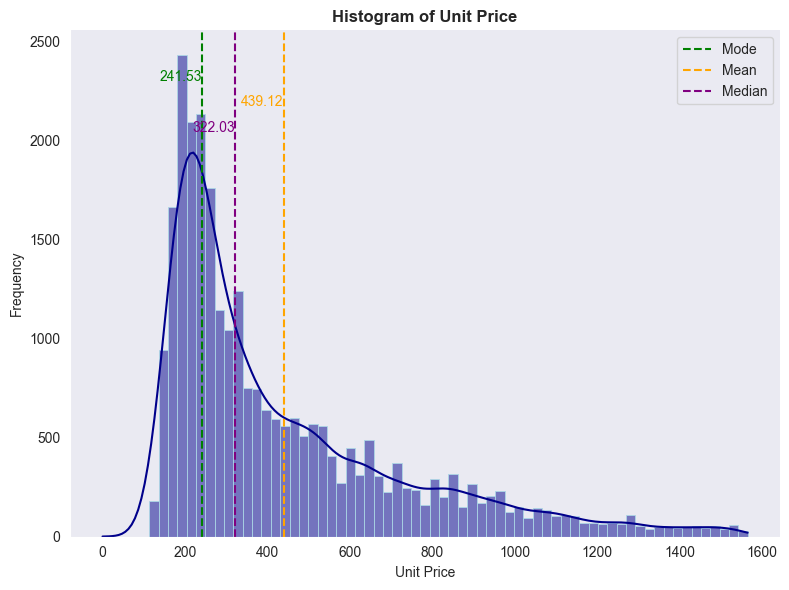

In [256]:
plt.figure(figsize=(8, 6))

sns.histplot(data=cleaned_unit_price_df,
            x='unit_price', kde=True, color='darkblue',
            edgecolor = 'lightblue')

mode_val = cleaned_unit_price_df['unit_price'].mode().iloc[0]
mean_val = cleaned_unit_price_df['unit_price'].mean()
median_val = cleaned_unit_price_df['unit_price'].median()

plt.axvline(mode_val, color='green', linestyle='--', label='Mode')
plt.axvline(mean_val, color='orange', linestyle='--', label='Mean')
plt.axvline(median_val, color='purple', linestyle='--', label='Median')

plt.text(mode_val, plt.ylim()[1]*0.9, f'{mode_val:.2f}', color='green', ha='right')
plt.text(mean_val, plt.ylim()[1]*0.85, f'{mean_val:.2f}', color='orange', ha='right')
plt.text(median_val, plt.ylim()[1]*0.8, f'{median_val:.2f}', color='purple', ha='right')

plt.title("Histogram of Unit Price", fontweight='bold')
plt.xlabel("Unit Price")
plt.ylabel("Frequency")

sns.despine()

plt.legend()
plt.tight_layout()
plt.show()


In [301]:
def plot_boxplot(data: pd.DataFrame, column: str):
    """
    Generates a boxplot for a specified column in a DataFrame.

    Args:
    -----
        data (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to generate the boxplot for.

    Returns:
    --------
        None: Displays the boxplot.

    """
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=data, y=column, color='darkblue')

    min_value = data[column].min()
    max_value = data[column].max()
    q25 = data[column].quantile(0.25)
    median = data[column].median()
    q75 = data[column].quantile(0.75)
    whisker_low = max(q25 - 1.5 * (q75 - q25), min_value)
    whisker_high = min(q75 + 1.5 * (q75 - q25), max_value)

    ax.text(0.5, q25, f'{q25:.2f}', va='center', ha='center', backgroundcolor='yellow')
    ax.text(0.5, median, f'{median:.2f}', va='center', ha='center', backgroundcolor='green')
    ax.text(0.5, q75, f'{q75:.2f}', va='center', ha='center', backgroundcolor='lightblue')
    ax.text(0.5, whisker_low, f'{whisker_low:.2f}', va='center', ha='center', backgroundcolor='red')
    ax.text(0.5, whisker_high, f'{whisker_high:.2f}', va='center', ha='center', backgroundcolor='crimson')

    ax.axhline(data[column].quantile(0.25), color='yellow', linestyle='--', label='25% Quantile')
    ax.axhline(data[column].median(), color='green', linestyle='--', label='50% Quantile')
    ax.axhline(data[column].quantile(0.75), color='lightblue', linestyle='--', label='75% Quantile')
    ax.axhline(whisker_low, color='red', linestyle='--', label='Lower Whisker')
    ax.axhline(whisker_high, color='crimson', linestyle='--', label='Upper Whisker')

    plt.title("Boxplot of " + column, fontweight='bold')
    plt.ylabel(column)

    plt.legend()

    plt.tight_layout()
    plt.show()


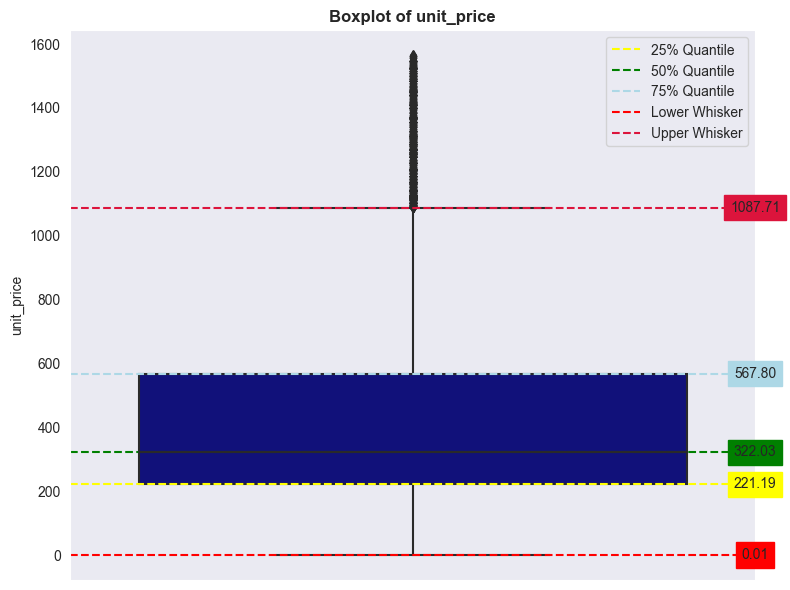

In [302]:
plot_boxplot(cleaned_unit_price_df, 'unit_price')